<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/TCCfinaldolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdolar.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['dol'] = dfa['dol']
df['dol'] = pd.to_numeric(df['dol'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)


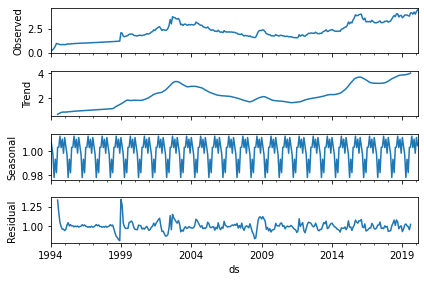

In [43]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

In [44]:
df.tail(30)

,y
ds,
2017-09-01,3.1614
2017-10-01,3.2724
2017-11-01,3.2726
2017-12-01,3.3121
2018-01-01,3.1858
2018-02-01,3.2458
2018-03-01,3.3046
2018-04-01,3.5066
2018-05-01,3.7225


In [5]:
df.dtypes

y    int64
dtype: object

In [6]:
print(df.shape)

(314, 1)


In [29]:
df.describe()

,y
count,314.000000
mean,269371.283439
std,184225.641732
min,4563.000000
25%,101859.000000
50%,216359.000000
75%,448483.500000
max,647460.000000


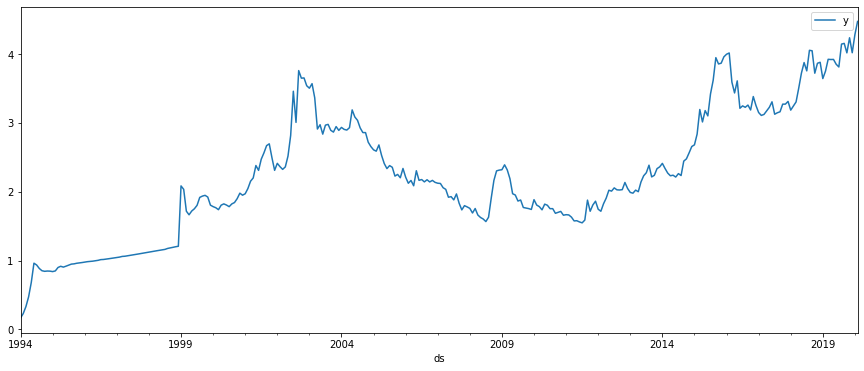

In [45]:
df.plot(figsize=(15,6))

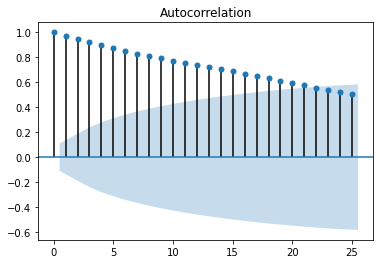

In [46]:
plot_acf(df)
plt.show()

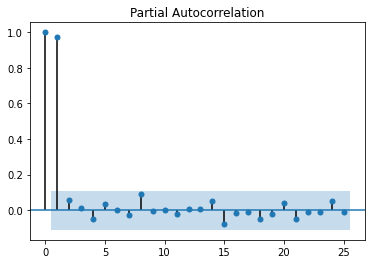

In [47]:
plot_pacf(df)
plt.show()

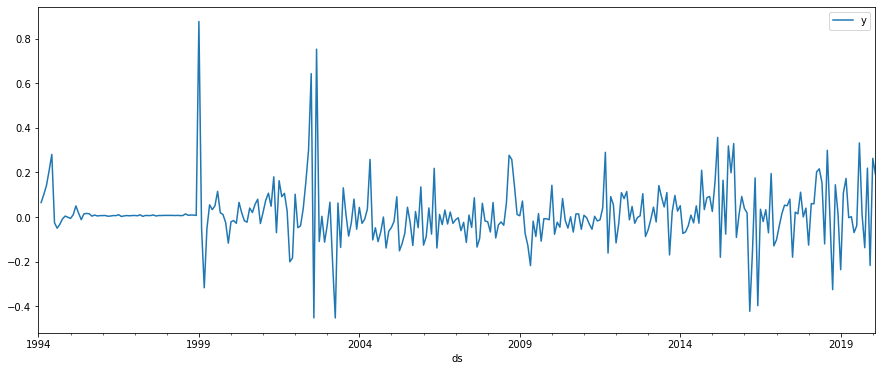

In [48]:
df.diff().plot(figsize=(15,6))

In [50]:
arima = ARIMA(df, freq='MS', order=(1,2,2)).fit()
(arima.resid ** 2).mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


0.01864176412104848

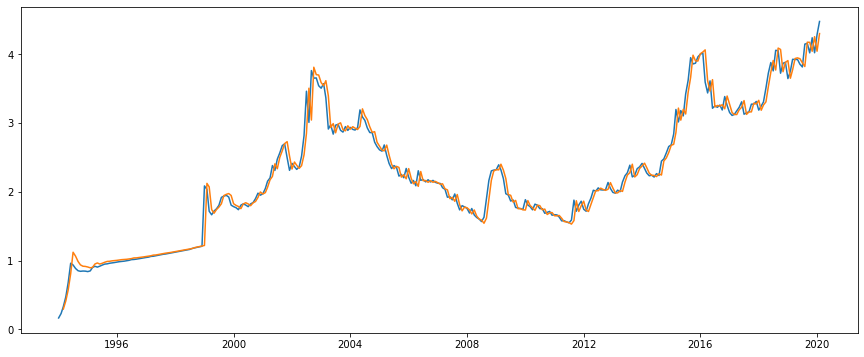

In [51]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(arima.predict(typ='levels'))

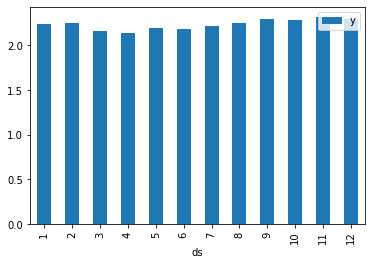

In [52]:
df.groupby(df.index.month).mean().plot(kind='bar')